<a href="https://colab.research.google.com/github/ryanditata/machineLearning/blob/main/LSTM_Goto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import library yang dibutuhkan
import yfinance as yf
import pandas as pd

# Tanggal awal dan akhir untuk data historis yang ingin diambil
df = yf.download("GOTO.JK", start="2022-04-11", end="2025-06-13")
df.reset_index(inplace=True)

# Simpan dataset
df.to_csv("dataset_goto.csv", index=False)

# Menampilkan hasil
df

[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,GOTO.JK,GOTO.JK,GOTO.JK,GOTO.JK,GOTO.JK
0,2022-04-11,382.0,416.0,372.0,400.0,9410897000
1,2022-04-12,370.0,442.0,360.0,422.0,3887331000
2,2022-04-13,374.0,380.0,360.0,370.0,3262811400
3,2022-04-14,376.0,382.0,374.0,374.0,3675981900
4,2022-04-18,378.0,380.0,370.0,376.0,2660312700
...,...,...,...,...,...,...
748,2025-06-04,62.0,65.0,61.0,62.0,4930864400
749,2025-06-05,61.0,63.0,61.0,62.0,2076518800
750,2025-06-10,66.0,67.0,62.0,62.0,8602718000


In [ ]:
# Dataset
df = pd.read_csv("dataset_goto.csv")
print(df.head())

         Date  Close   High    Low   Open      Volume
0  2022-04-11  382.0  416.0  372.0  400.0  9410897000
1  2022-04-12  370.0  442.0  360.0  422.0  3887331000
2  2022-04-13  374.0  380.0  360.0  370.0  3262811400
3  2022-04-14  376.0  382.0  374.0  374.0  3675981900
4  2022-04-18  378.0  380.0  370.0  376.0  2660312700


In [ ]:
# Ubah kolom 'Date' menjadi datetime
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Mengambil kolom Date dan Close
data = df [['Date', 'Close']]
data.head()

,Date,Close
0,2022-04-11,382.0
1,2022-04-12,370.0
2,2022-04-13,374.0
3,2022-04-14,376.0
4,2022-04-18,378.0


In [ ]:
# Melihat data yang kosong
data.isna().sum()

,0
Date,0
Close,0


In [ ]:
# Melihat informasi pada data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    753 non-null    datetime64[ns]
 1   Close   753 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.9 KB


In [ ]:
# Melihat deskripsi data
data.describe()

,Date,Close
count,753,753.000000
mean,2023-11-03 13:44:13.386454016,124.925631
min,2022-04-11 00:00:00,50.000000
25%,2023-01-13 00:00:00,70.000000
50%,2023-10-31 00:00:00,87.000000
75%,2024-08-20 00:00:00,119.000000
max,2025-06-12 00:00:00,404.000000
std,NaN,88.532509


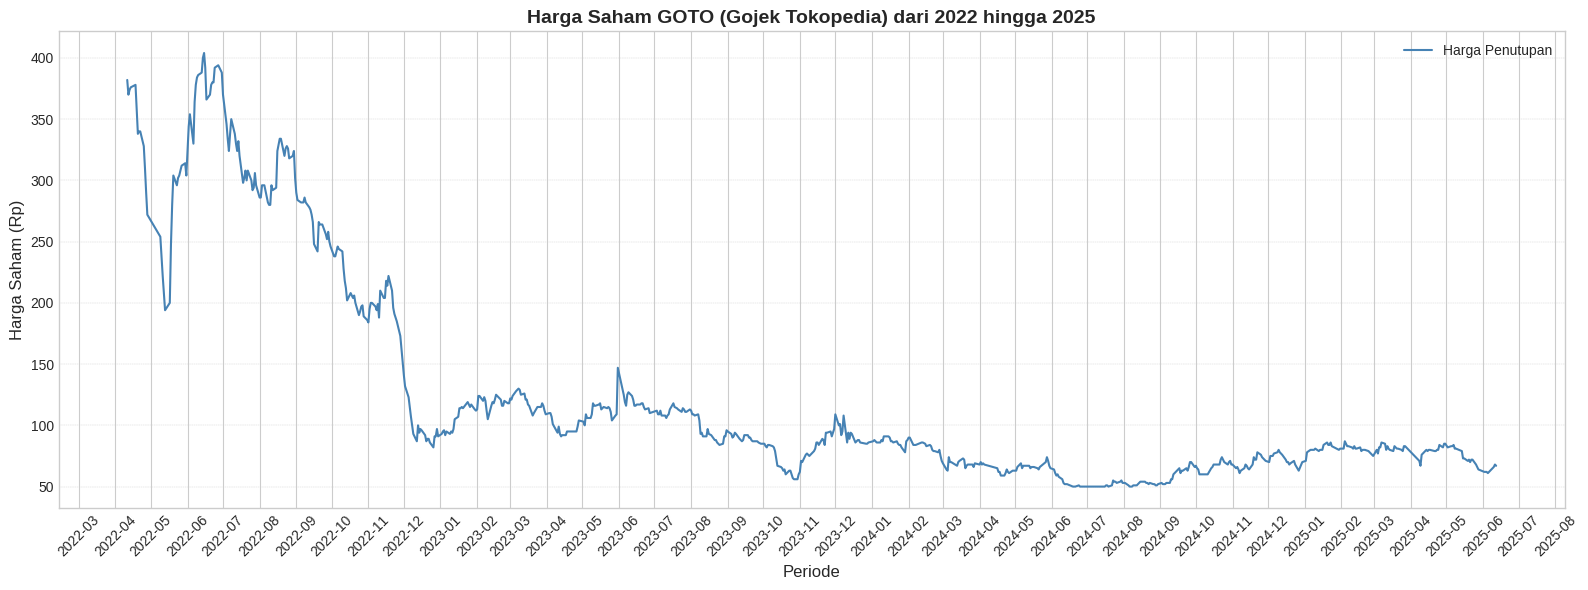

In [ ]:
# Import library yang dibutuhkan
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Visualisasi data
plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(16, 6))
plt.title('Harga Saham GOTO (Gojek Tokopedia) dari 2022 hingga 2025', fontsize=14, fontweight='bold')

# Garis harga saham
plt.plot(data['Date'], data['Close'], color='steelblue', linewidth=1.5, label='Harga Penutupan')

# Label dan format
plt.xlabel('Periode', fontsize=12)
plt.ylabel('Harga Saham (Rp)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Format tanggal di sumbu x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# Tambahan visual
plt.grid(True, linestyle='--', linewidth=0.3, axis='y')
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
# Melakukan normalisasi
sc = MinMaxScaler(feature_range=(0, 1))
data_sc = sc.fit_transform(data[['Close']].values)

In [ ]:
# Melakukan pembagian data dengan Hold-Out Validation
train_len = math.ceil(len(data_sc) * .8)
val_len = math.ceil(train_len * 0.2)
train_len = train_len - val_len
test_len = math.ceil(len(data_sc) * .2)

In [ ]:
# Menampilkan jumlah data
train_len, val_len, test_len

(482, 121, 151)

In [ ]:
# Membuat Timestamps pada data Training
train_data = data_sc[0:train_len, :]
x_train = []
y_train = []

for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i, 0])

In [ ]:
# Mengubah tipe data list menjadi NumPy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Ubah bentuk data menjadi bentuk yang diterima oleh LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
# Membuat Timestamps pada data Validation
val_data = data_sc[train_len - 30:(train_len + val_len), :]
x_val = []
y_val = []

for i in range(30, len(val_data)):
    x_val.append(val_data[i-30:i, 0])
    y_val.append(val_data[i, 0])

In [ ]:
# Mengubah tipe data list menjadi NumPy array
x_val, y_val = np.array(x_val), np.array(y_val)

In [ ]:
# Ubah bentuk data menjadi bentuk yang diterima oleh LSTM
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

In [ ]:
# Membangun arsitektur LSTM
import tensorflow as tf
from keras.layers import LSTM, Dropout, Dense
from keras.models import Sequential

model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=100))
model.add(Dropout(0.2))
model.add(Dense(units=50))
model.add(Dense(units=1))  # Kasus regresi memprediksi satu output

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Mendefinisikan fungsi Callback
import tensorflow as tf
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early Stopping
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    min_delta=0.00001,
    verbose=1,
    restore_best_weights=True
)

# Model Checkpoint
checkpoint_path = 'model_checkpoints/weights_lstm_model.weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

In [ ]:
# Konfigurasi optimizer dan loss function serta Compile Model
op = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=op, loss='mean_squared_error')

In [ ]:
# Melakukan training pada model LSTM
history = model.fit(x_train, y_train, batch_size=16, epochs=100,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint])

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0739
Epoch 1: val_loss improved from inf to 0.00714, saving model to model_checkpoints/weights_lstm_model.weights.h5
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - loss: 0.0729 - val_loss: 0.0071
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0083
Epoch 2: val_loss improved from 0.00714 to 0.00231, saving model to model_checkpoints/weights_lstm_model.weights.h5
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0083 - val_loss: 0.0023
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0057
Epoch 3: val_loss improved from 0.00231 to 0.00078, saving model to model_checkpoints/weights_lstm_model.weights.h5
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0057 - val_loss: 7.8158e-04
Epoch 4/100
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0049
Epoch 4: val_loss improved from 0.00078 to 0.00036, saving model to model_checkpoints/weights_lstm_model.weights.h5
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - los

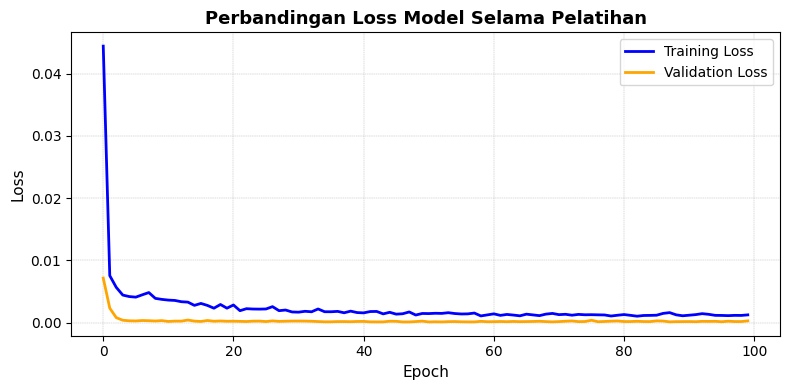

In [ ]:
import matplotlib.pyplot as plt

# Menampilkan plot nilai loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linewidth=2)

plt.title('Perbandingan Loss Model Selama Pelatihan', fontsize=13, fontweight='bold')
plt.xlabel('Epoch', fontsize=11)
plt.ylabel('Loss', fontsize=11)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.legend(loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Membuat Time Step pada data testing
test_data = data_sc[(-test_len - 30): , :]

# Create the x_test and y_test data sets
x_test = []
y_test = data[['Close']].iloc[-test_len : , :].values
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])

In [ ]:
# Mengubah tipe data list menjadi NumPy array
x_test = np.array(x_test)

In [ ]:
# Ubah bentuk data menjadi bentuk yang diterima oleh LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# Load bobot model terbaik
model.load_weights('/content/model_checkpoints/weights_lstm_model.weights.h5')

In [ ]:
# Melakukan prediksi
y_pred = model.predict(x_test)
y_pred = np.ceil(sc.inverse_transform(y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step


In [ ]:
# Evaluasi dengan MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

20.3841059602649

In [ ]:
# Evaluasi dengan RMSE
rmse = np.sqrt(np.mean((y_test - y_pred)**2))
rmse

np.float64(4.514876073633129)

In [ ]:
# Evaluasi dengan MAE
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae

3.629139072847682

In [ ]:
# Evaluasi dengan MAPE
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_test, y_pred) * 100
print(mape, '%')

4.858510359983037 %


In [ ]:
# Plot/Buat data untuk grafik
data_pred = data[-test_len:].copy()
data_pred['Prediction'] = y_pred
data_pred

,Date,Close,Prediction
602,2024-10-14,65.0,61.0
603,2024-10-15,66.0,61.0
604,2024-10-16,68.0,61.0
605,2024-10-17,68.0,62.0
606,2024-10-18,68.0,63.0
...,...,...,...
748,2025-06-04,62.0,65.0
749,2025-06-05,61.0,64.0
750,2025-06-10,66.0,63.0
751,2025-06-11,68.0,62.0


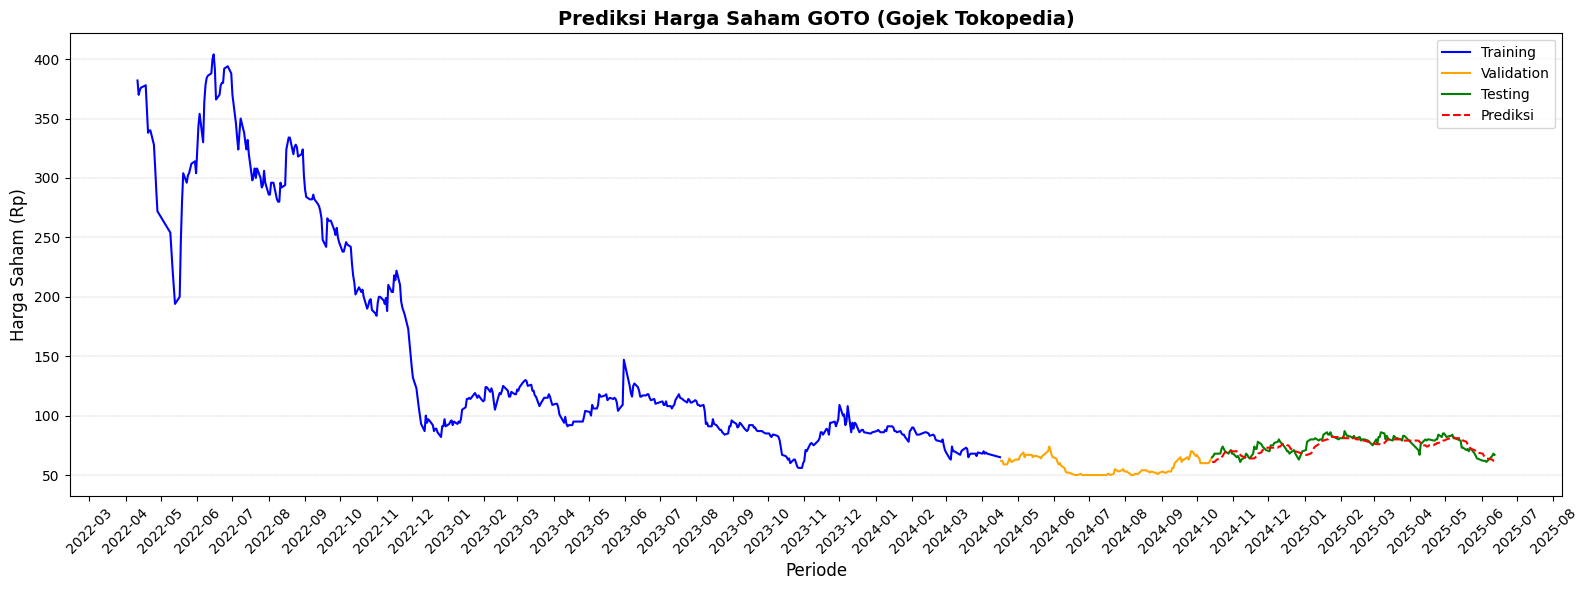

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plot/Buat data untuk grafik
train = data[:train_len]
valid = data[train_len:(train_len + val_len)]

# Visualisasi Prediksi
plt.figure(figsize=(16, 6))
plt.title('Prediksi Harga Saham GOTO (Gojek Tokopedia)', fontsize=14, fontweight='bold')
plt.plot(train['Date'], train['Close'], label='Training', color='blue')
plt.plot(valid['Date'], valid['Close'], label='Validation', color='orange')
plt.plot(data_pred['Date'], data_pred['Close'], label='Testing', color='green')
plt.plot(data_pred['Date'], data_pred['Prediction'], label='Prediksi', color='red', linestyle='--')

# Format sumbu X
plt.xlabel('Periode', fontsize=12)
plt.ylabel('Harga Saham (Rp)', fontsize=12)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # tampilkan tiap 1 bulan

# Grid dan legenda
plt.grid(True, linewidth=0.3, axis='y', linestyle='--')
plt.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

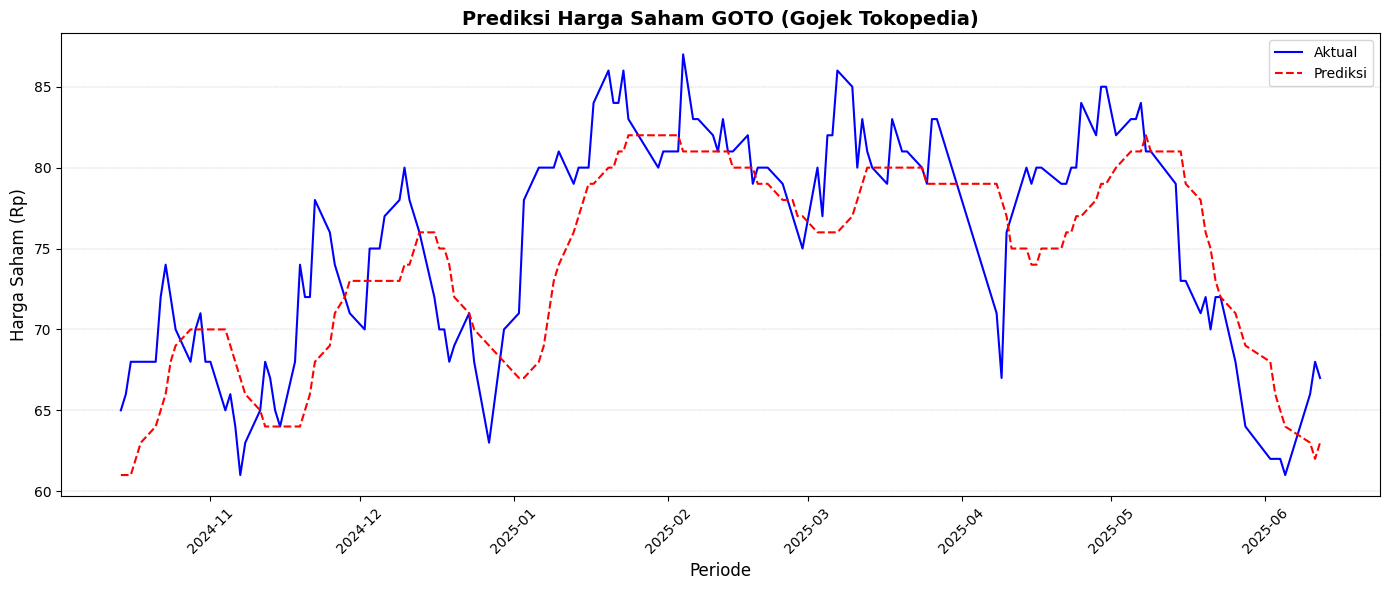

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Visualisasi Prediksi
plt.figure(figsize=(14, 6))
plt.title('Prediksi Harga Saham GOTO (Gojek Tokopedia)', fontsize=14, fontweight='bold')

# Plot data aktual dan prediksi
plt.plot(data_pred['Date'], data_pred['Close'], label='Aktual', color='blue')
plt.plot(data_pred['Date'], data_pred['Prediction'], label='Prediksi', color='red', linestyle='--')

# Format sumbu x dan y
plt.xlabel('Periode', fontsize=12)
plt.ylabel('Harga Saham (Rp)', fontsize=12)
plt.xticks(rotation=45)

# Format tanggal di sumbu x (opsional jika kolom Date berupa datetime)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# Tampilan tambahan
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, linewidth=0.3, axis='y', linestyle='--')
plt.tight_layout()
plt.show()